In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
battles = pd.read_csv('C:\\Users\\posit\\Downloads\\datasets_43_77_battles.csv')

In [63]:
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [64]:
deaths = pd.read_csv('C:\\Users\\posit\\Downloads\\datasets_43_77_character-deaths.csv')

In [65]:
deaths.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [66]:
battles.columns

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note'],
      dtype='object')

In [67]:
bat2 = battles[['attacker_king', 'defender_king','attacker_size','defender_size','attacker_commander','defender_commander']]

In [68]:
bat2.head()

,attacker_king,defender_king,attacker_size,defender_size,attacker_commander,defender_commander
0,Joffrey/Tommen Baratheon,Robb Stark,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance"
1,Joffrey/Tommen Baratheon,Robb Stark,NaN,120.0,Gregor Clegane,Beric Dondarrion
2,Joffrey/Tommen Baratheon,Robb Stark,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood"
3,Robb Stark,Joffrey/Tommen Baratheon,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist..."
4,Robb Stark,Joffrey/Tommen Baratheon,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister


In [69]:
type(bat2['defender_commander'])

pandas.core.series.Series

In [70]:
bat2['defender_commander'] = bat2['defender_commander'].str.split(pat = ",")

C:\Users\posit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
bat2['index'] = bat2.index

C:\Users\posit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
bat2.head()

,attacker_king,defender_king,attacker_size,defender_size,attacker_commander,defender_commander,index
0,Joffrey/Tommen Baratheon,Robb Stark,15000.0,4000.0,Jaime Lannister,"[Clement Piper, Vance]",0
1,Joffrey/Tommen Baratheon,Robb Stark,NaN,120.0,Gregor Clegane,[Beric Dondarrion],1
2,Joffrey/Tommen Baratheon,Robb Stark,15000.0,10000.0,"Jaime Lannister, Andros Brax","[Edmure Tully, Tytos Blackwood]",2
3,Robb Stark,Joffrey/Tommen Baratheon,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","[Tywin Lannister, Gregor Clegane, Kevan Lann...",3
4,Robb Stark,Joffrey/Tommen Baratheon,1875.0,6000.0,"Robb Stark, Brynden Tully",[Jaime Lannister],4


In [73]:
defend_comm = bat2['defender_commander'].explode()

In [74]:
defend_comm.head()

0       Clement Piper
0               Vance
1    Beric Dondarrion
2        Edmure Tully
2     Tytos Blackwood
Name: defender_commander, dtype: object

In [75]:
defend_comm = pd.DataFrame(defend_comm)

In [76]:
defend_comm.head()

,defender_commander
0,Clement Piper
0,Vance
1,Beric Dondarrion
2,Edmure Tully
2,Tytos Blackwood


In [77]:
defend_comm['index'] = defend_comm.index

In [78]:
defend_comm.head()

,defender_commander,index
0,Clement Piper,0
0,Vance,0
1,Beric Dondarrion,1
2,Edmure Tully,2
2,Tytos Blackwood,2


In [79]:
df_for_net = pd.merge(bat2, defend_comm, on='index', how='inner')

In [80]:
df_for_net.head()

,attacker_king,defender_king,attacker_size,defender_size,attacker_commander,defender_commander_x,index,defender_commander_y
0,Joffrey/Tommen Baratheon,Robb Stark,15000.0,4000.0,Jaime Lannister,"[Clement Piper, Vance]",0,Clement Piper
1,Joffrey/Tommen Baratheon,Robb Stark,15000.0,4000.0,Jaime Lannister,"[Clement Piper, Vance]",0,Vance
2,Joffrey/Tommen Baratheon,Robb Stark,NaN,120.0,Gregor Clegane,[Beric Dondarrion],1,Beric Dondarrion
3,Joffrey/Tommen Baratheon,Robb Stark,15000.0,10000.0,"Jaime Lannister, Andros Brax","[Edmure Tully, Tytos Blackwood]",2,Edmure Tully
4,Joffrey/Tommen Baratheon,Robb Stark,15000.0,10000.0,"Jaime Lannister, Andros Brax","[Edmure Tully, Tytos Blackwood]",2,Tytos Blackwood


In [81]:
bat2['attacker_commander'] = bat2['attacker_commander'].str.split(pat = ",")

C:\Users\posit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
attack_comm = bat2['attacker_commander'].explode()

In [83]:
attack_comm = pd.DataFrame(attack_comm)

In [84]:
attack_comm['index'] = attack_comm.index

In [85]:
attack_comm.head()

,attacker_commander,index
0,Jaime Lannister,0
1,Gregor Clegane,1
2,Jaime Lannister,2
2,Andros Brax,2
3,Roose Bolton,3


In [86]:
df_for_net = pd.merge(df_for_net, attack_comm, on='index', how='inner')

In [87]:
df_for_net.columns

Index(['attacker_king', 'defender_king', 'attacker_size', 'defender_size',
       'attacker_commander_x', 'defender_commander_x', 'index',
       'defender_commander_y', 'attacker_commander_y'],
      dtype='object')

In [88]:
df_for_net = df_for_net[['attacker_king', 'defender_king','defender_commander_y', 'attacker_commander_y']]

In [89]:
df_for_net.head()

,attacker_king,defender_king,defender_commander_y,attacker_commander_y
0,Joffrey/Tommen Baratheon,Robb Stark,Clement Piper,Jaime Lannister
1,Joffrey/Tommen Baratheon,Robb Stark,Vance,Jaime Lannister
2,Joffrey/Tommen Baratheon,Robb Stark,Beric Dondarrion,Gregor Clegane
3,Joffrey/Tommen Baratheon,Robb Stark,Edmure Tully,Jaime Lannister
4,Joffrey/Tommen Baratheon,Robb Stark,Edmure Tully,Andros Brax


In [90]:
kings = df_for_net[['attacker_king', 'defender_king']]
comms = df_for_net[['attacker_commander_y','defender_commander_y']]

In [91]:
kings['defender_king'].value_counts()

Joffrey/Tommen Baratheon    93
Robb Stark                  46
Mance Rayder                20
Renly Baratheon             10
Balon/Euron Greyjoy          6
Stannis Baratheon            4
Name: defender_king, dtype: int64

In [92]:
kings.isnull().sum()

attacker_king    2
defender_king    3
dtype: int64

In [93]:
kings.dropna(axis=0, inplace=True)

C:\Users\posit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [94]:
comms.isnull().sum()

attacker_commander_y     1
defender_commander_y    12
dtype: int64

In [95]:
comms.dropna(axis=0, inplace=True)

C:\Users\posit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
comms['defender_commander_y'] = [x.strip(' ') for x in comms['defender_commander_y']]

C:\Users\posit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [97]:
comms['attacker_commander_y'] = [x.strip(' ') for x in comms['attacker_commander_y']]

C:\Users\posit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [98]:
comms['defender_commander_y'].value_counts()

Tywin Lannister       11
Randyll Tarly         10
Edmure Tully           8
Gregor Clegane         7
Jason Mallister        7
Karyl Vance            6
Garlan Tyrell          6
Tyrion Lannister       6
Mace Tyrell            6
Sandor Clegane         6
Jacelyn Bywater        6
Addam Marbrand         5
Donal Noye             5
Jon Snow               5
Cotter Pyke            5
Stannis Baratheon      5
Kevan Lannister        5
Tytos Blackwood        4
Robb Stark             3
Brynden Tully          3
Rolph Spicer           3
Forley Prester         3
Amory Lorch            3
Lord Andros Brax       3
Roland Crakehall       2
Renly Baratheon        2
Antario Jast           2
Cley Cerwyn            2
Loras Tyrell           2
Rodrik Cassel          2
Asha Greyjoy           2
Stafford Lannister     2
Rolland Storm          2
Cortnay Penrose        2
Mathis Rowan           2
Gilbert Farring        2
Jaime Lannister        2
Dagmer Cleftjaw        2
Leobald Tallhart       2
Roose Bolton           2


In [99]:
comms['attacker_commander_y'].value_counts()

Stannis Baratheon     14
Davos Seaworth        12
Gregor Clegane         8
Salladhor Saan         7
Robb Stark             7
Imry Florent           7
Guyard Morrigen        7
Rolland Storm          7
Roose Bolton           6
Jaime Lannister        6
Brynden Tully          6
Varamyr                4
Mance Rayder           4
Harma Dogshead         4
Magnar Styr            4
Medger Cerwyn          4
Harrion Karstark       4
Wylis Manderly         4
Theon Greyjoy          4
Tormund Giantsbane     4
Halys Hornwood         4
Lyle Crakehall         3
Tywin Lannister        3
Ramsay Snow            3
Addam Marbrand         3
Flement Brax           3
Leo Lefford            3
Walder Frey            2
Helman Tallhart        2
Robertt Glover         2
Tytos Blackwood        2
Andros Brax            2
Mace Tyrell            1
Ryman Fey              1
Mathis Rowan           1
Walder Rivers          1
Daven Lannister        1
Smalljon Umber         1
Loras Tyrell           1
Raxter Redwyne         1


In [100]:
import networkx as nx

In [101]:
g = nx.Graph()

In [102]:
for i in kings.index:
    g.add_edge(kings['attacker_king'][i],kings['defender_king'][i])

In [103]:
g.nodes()

NodeView(('Joffrey/Tommen Baratheon', 'Robb Stark', 'Balon/Euron Greyjoy', 'Stannis Baratheon', 'Renly Baratheon', 'Mance Rayder'))

In [104]:
g.edges()

EdgeView([('Joffrey/Tommen Baratheon', 'Robb Stark'), ('Joffrey/Tommen Baratheon', 'Stannis Baratheon'), ('Joffrey/Tommen Baratheon', 'Balon/Euron Greyjoy'), ('Robb Stark', 'Balon/Euron Greyjoy'), ('Balon/Euron Greyjoy', 'Balon/Euron Greyjoy'), ('Balon/Euron Greyjoy', 'Stannis Baratheon'), ('Stannis Baratheon', 'Renly Baratheon'), ('Stannis Baratheon', 'Mance Rayder')])

In [105]:
# Define find_nodes_with_highest_deg_cent()
def find_nodes_with_highest_deg_cent(g):

    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(g)
    # Compute the maximum degree centrality: max_dc
    max_1_dc = max(list(deg_cent.values()))
    max_2_dc = list(sorted(deg_cent.values()))[-2]
    max_3_dc = list(sorted(deg_cent.values()))[-3]

    maxnode1 = set()
    maxnode2 = set()
    maxnode3 = set()

    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():

        # Check if the current value has the maximum degree centrality
        if v == max_1_dc:

            # Add the current node to the set of nodes
            maxnode1.add(k)
        if v == max_2_dc:

            # Add the current node to the set of nodes
            maxnode2.add(k)
        if v == max_3_dc:

            # Add the current node to the set of nodes
            maxnode3.add(k)

    return maxnode1,maxnode2,maxnode3

top_deg_dc,top2_deg_dc,top3_deg_dc = find_nodes_with_highest_deg_cent(g)
print(top_deg_dc,top2_deg_dc,top3_deg_dc)

{'Balon/Euron Greyjoy'} {'Stannis Baratheon'} {'Joffrey/Tommen Baratheon'}


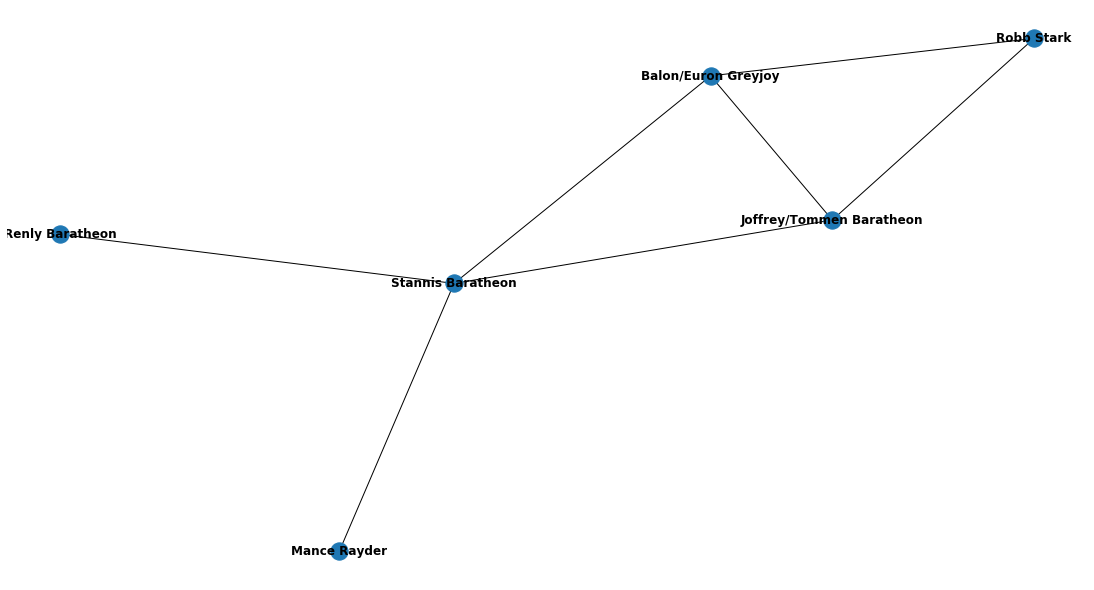

In [106]:
plt.figure(figsize=(15,8)) 
nx.draw(g, with_labels=True, font_weight='bold')
plt.show()

In [107]:
g2 = nx.Graph()

for i in comms.index:
    g2.add_edge(comms['attacker_commander_y'][i],comms['defender_commander_y'][i])

top_deg_dc,top2_deg_dc,top3_deg_dc = find_nodes_with_highest_deg_cent(g2)
print(top_deg_dc,top2_deg_dc,top3_deg_dc)

{'Stannis Baratheon'} {'Tywin Lannister'} {'Gregor Clegane'}


In [108]:
from networkx.algorithms import community

In [109]:
betw = nx.betweenness_centrality(g2)

In [110]:
nx.set_node_attributes(g2, betw, 'Betweenness')

In [111]:
communities = sorted(community.greedy_modularity_communities(g2), key=len, reverse=True)
len(communities)

5

In [112]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')

In [113]:
def set_node_community(G, communities):
        '''Add community to node attributes'''
        for c, v_c in enumerate(communities):
            for v in v_c:
                # Add 1 to save 0 for external edges
                G.nodes[v]['community'] = c + 1

In [114]:
def set_edge_community(G):
        '''Find internal edges and add their community to their attributes'''
        for v, w, in G.edges:
            if G.nodes[v]['community'] == G.nodes[w]['community']:
                # Internal edge, mark with community
                G.edges[v, w]['community'] = G.nodes[v]['community']
            else:
                # External edge, mark as 0
                G.edges[v, w]['community'] = 0

In [115]:
def get_color(i, r_off=1, g_off=1, b_off=1):
        '''Assign a color to a vertex.'''
        r0, g0, b0 = 0, 0, 0
        n = 16
        low, high = 0.1, 0.9
        span = high - low
        r = low + span * (((i + r_off) * 3) % n) / (n - 1)
        g = low + span * (((i + g_off) * 5) % n) / (n - 1)
        b = low + span * (((i + b_off) * 7) % n) / (n - 1)
        return (r, g, b)            

In [116]:
# Set node and edge communities
set_node_community(g2, communities)
set_edge_community(g2)

In [117]:
# Set community color for internal edges
external = [(v, w) for v, w in g2.edges if g2.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in g2.edges if g2.edges[v, w]['community'] > 0]
internal_color = ["black" for e in internal]
node_color = [get_color(g2.nodes[v]['community']) for v in g2.nodes]

C:\Users\posit\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


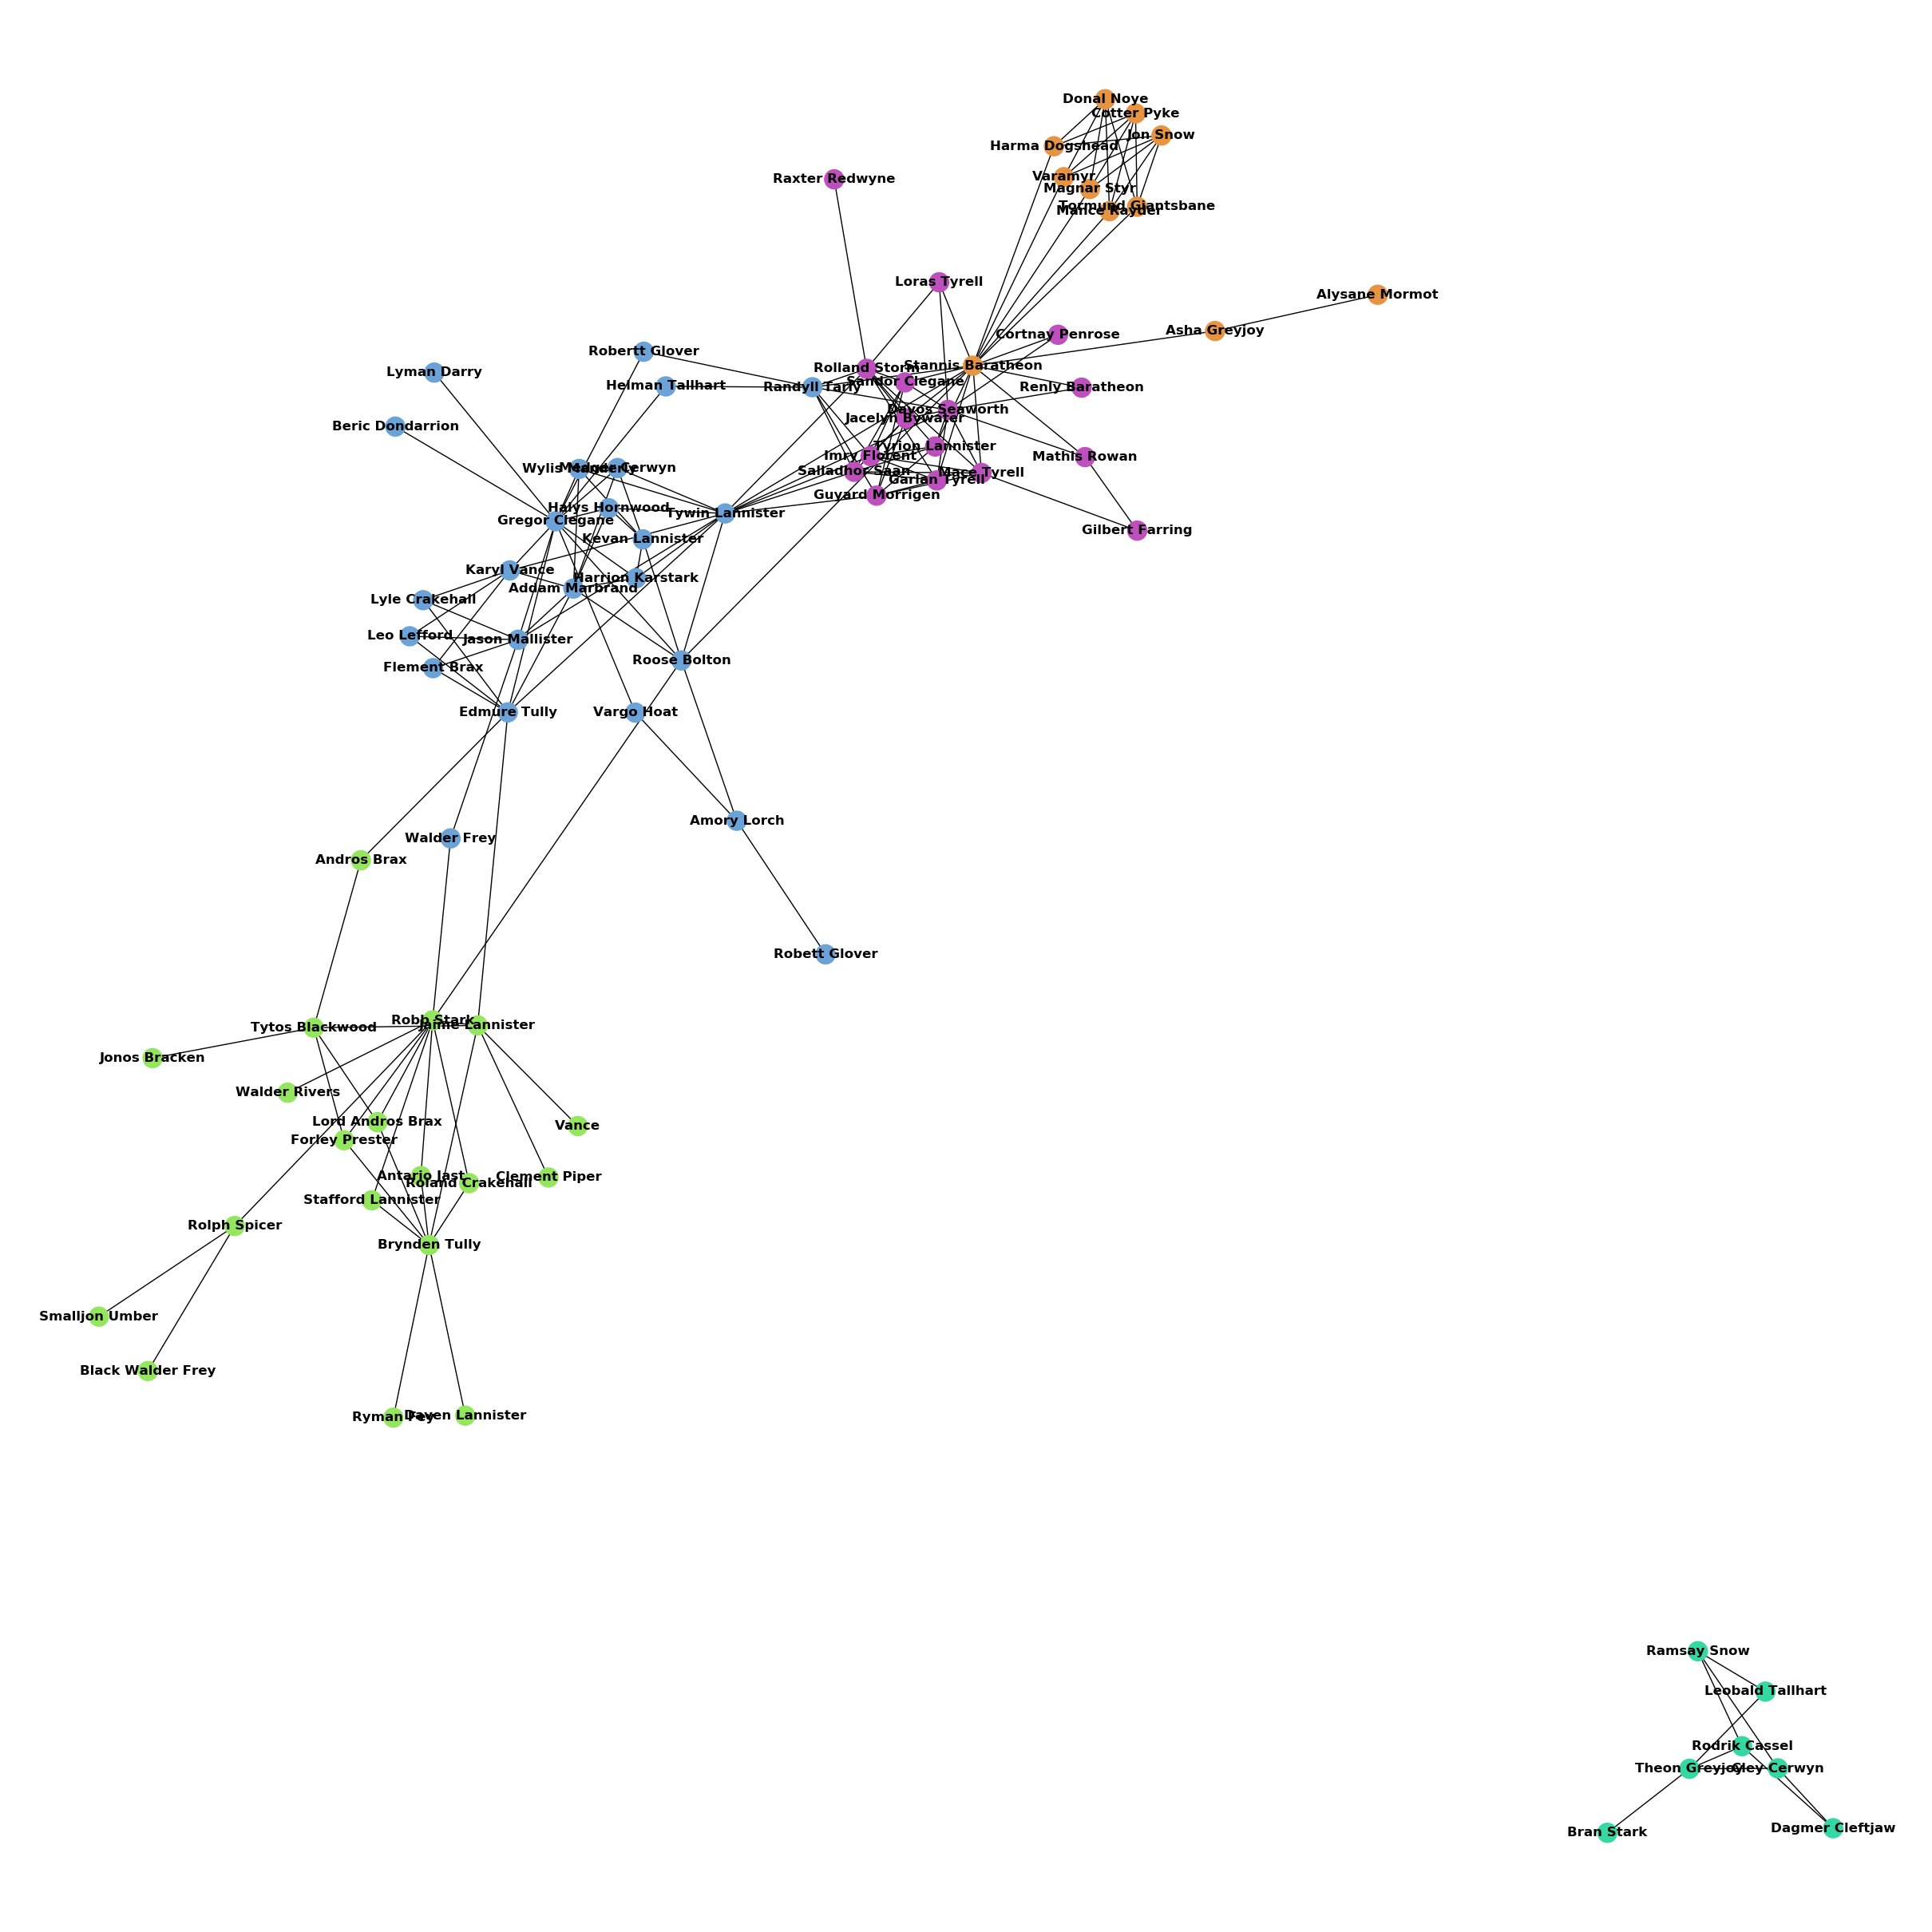

In [118]:
plt.figure(figsize=(24,24)) 
nx.draw(g2,with_labels=True, font_weight='bold',node_color=node_color)
plt.show()

In [119]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patheffects as path_effects
from mpl_toolkits.mplot3d.art3d import Line3DCollection

In [120]:
cols = ['steelblue', 'darksalmon', 'mediumseagreen']

In [121]:
np.random.seed(1983)

In [123]:
from networkx.algorithms.core import k_core,core_number

In [129]:
core = nx.k_core(g2)

In [130]:
core_num = nx.core_number(g2)

In [136]:
# Imagine you have three node-aligned snapshots of a network
G1 = nx.k_core(g2, 6)
G2 = nx.k_core(g2, 4)
G3 = nx.k_core(g2, 2)

pos = nx.spring_layout(G3) # assuming common node location
graphs = [G1,G2, G3]

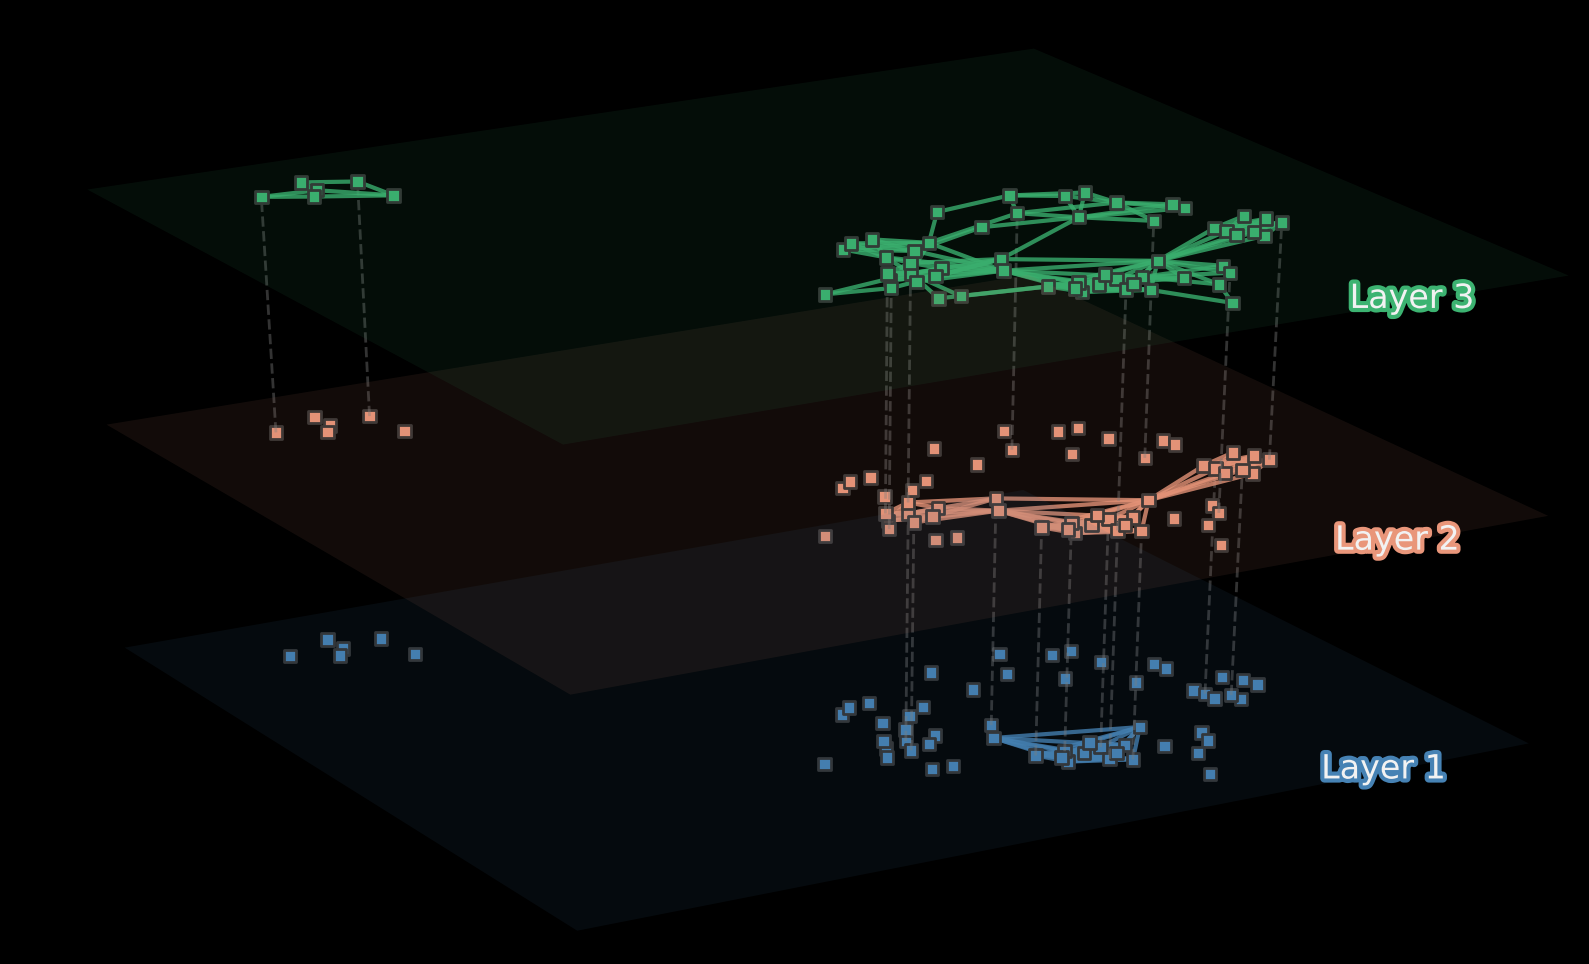

In [141]:
w = 10
h = 6

fig, ax = plt.subplots(1, 1, figsize=(w,h), dpi=200, subplot_kw={'projection':'3d'})

for gi, G in enumerate(graphs):
    # node positions
    xs = list(list(zip(*list(pos.values())))[0])
    ys = list(list(zip(*list(pos.values())))[1])
    zs = [gi]*len(xs) # set a common z-position of the nodes 

    # node colors
    cs = [cols[gi]]*len(xs)
    
    # if you want to have between-layer connections
    if gi > 0:
        thru_nodes = np.random.choice(list(G.nodes()),10,replace=False)
        lines3d_between = [(list(pos[i])+[gi-1],list(pos[i])+[gi]) for i in thru_nodes]
        between_lines = Line3DCollection(lines3d_between, zorder=gi, color='.5',
                                         alpha=0.4, linestyle='--', linewidth=1)
        ax.add_collection3d(between_lines)

    # add within-layer edges 
    lines3d = [(list(pos[i])+[gi],list(pos[j])+[gi]) for i,j in G.edges()]
    line_collection = Line3DCollection(lines3d, zorder=gi, color=cols[gi], alpha=0.8)
    ax.add_collection3d(line_collection)
    
    # now add nodes
    ax.scatter(xs, ys, zs, c=cs, edgecolors='.2', marker='s', alpha=1, zorder=gi)
    
    # add a plane to designate the layer
    xdiff = max(xs)-min(xs)
    ydiff = max(ys)-min(ys)
    ymin = min(ys)-ydiff*0.1
    ymax = max(ys)+ydiff*0.1
    xmin = min(xs)-xdiff*0.1 * (w/h)
    xmax = max(xs)+xdiff*0.1 * (w/h)
    xx, yy = np.meshgrid([xmin, xmax],[ymin, ymax])
    zz = np.zeros(xx.shape)+gi
    ax.plot_surface(xx, yy, zz, color=cols[gi], alpha=0.1, zorder=gi)

    # add label
    layertext = ax.text(0.0, 1.15, gi*0.95+0.5, "Layer %i"%(gi+1),
                        color='.95', fontsize='large', zorder=1e5)
    # make the text ~~~fancy~~~ weeee
    layertext.set_path_effects([path_effects.Stroke(linewidth=3, foreground=cols[gi]),
                                path_effects.Normal()])

# set them all at the same x,y,zlims
ax.set_ylim(min(ys)-ydiff*0.1,max(ys)+ydiff*0.1)
ax.set_xlim(min(xs)-xdiff*0.1,max(xs)+xdiff*0.1)
ax.set_zlim(-0.1, len(graphs) - 1 + 0.1)

# select viewing angle
angle = 60
height_angle = 30
ax.view_init(height_angle, angle)

# how much do you want to zoom into the fig
ax.dist = 8.5

ax.set_axis_off()

plt.savefig('multilayer_network.png',dpi=425,bbox_inches='tight')
plt.show()